# Linear Regression

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

Linear regression has many practical uses. Most applications fall into one of the following two broad categories:

If the goal is prediction, forecasting, or error reduction, linear regression can be used to fit a predictive model to an observed data set of values of the response and explanatory variables. After developing such a model, if additional values of the explanatory variables are collected without an accompanying response value, the fitted model can be used to make a prediction of the response.
If the goal is to explain variation in the response variable that can be attributed to variation in the explanatory variables, linear regression analysis can be applied to quantify the strength of the relationship between the response and the explanatory variables, and in particular to determine whether some explanatory variables may have no linear relationship with the response at all, or to identify which subsets of explanatory variables may contain redundant information about the response.

## Algorithm

Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. The red line in the below graph is referred to as the best fit straight line. Based on the given data points, we try to plot a line that models the points the best.

<p align="center">
    <img src="LR1.png" width="500">
</p>

The line can be modelled based on the linear equation shown below.

$$
y = \beta_0+\beta_1x+\epsilon
$$


$x$is called the independent variable, and $y$ is called the dependent variable. Also, we refer to $x$ as the predictor or regressor, and $y$ as the response variable. The motive of the linear regression algorithm is to find the best values for $\beta_0$ and $\beta_1$

### Cost Function
The cost function helps us to figure out the best possible values for $\beta_0$ and $\beta_1$ which would provide the best fit line for the data points. Since we want the best values for $\beta_0$ and $\beta_1$, we convert this search problem into a minimization problem where we would like to minimize the error between the predicted value and the actual value.

<p align="center">
    <img src="LR2.png" width="200">
</p>

We choose the above function to minimize. The difference between the predicted values and ground truth measures the error difference. We square the error difference and sum over all data points and divide that value by the total number of data points. This provides the average squared error over all the data points. Therefore, this cost function is also known as the Mean Squared Error(MSE) function. Now, using this MSE function we are going to change the values of $\beta_0$ and $\beta_1$ such that the MSE value settles at the minima.

### Task 
We will implement and train this model on the diabetes dataset loaded from sklearn.datasets. The Introduction of diabetes dataset is described in README.md

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
from mlxtend.plotting import plot_decision_regions
sns.set_theme()

# Read the diabetes dataset
df = load_diabetes(return_X_y=True, as_frame=True)
dfx = df[0]
dfx.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
dfx.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [8]:
dfx.isnull().count()

age    442
sex    442
bmi    442
bp     442
s1     442
s2     442
s3     442
s4     442
s5     442
s6     442
dtype: int64

In [9]:
dfx.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

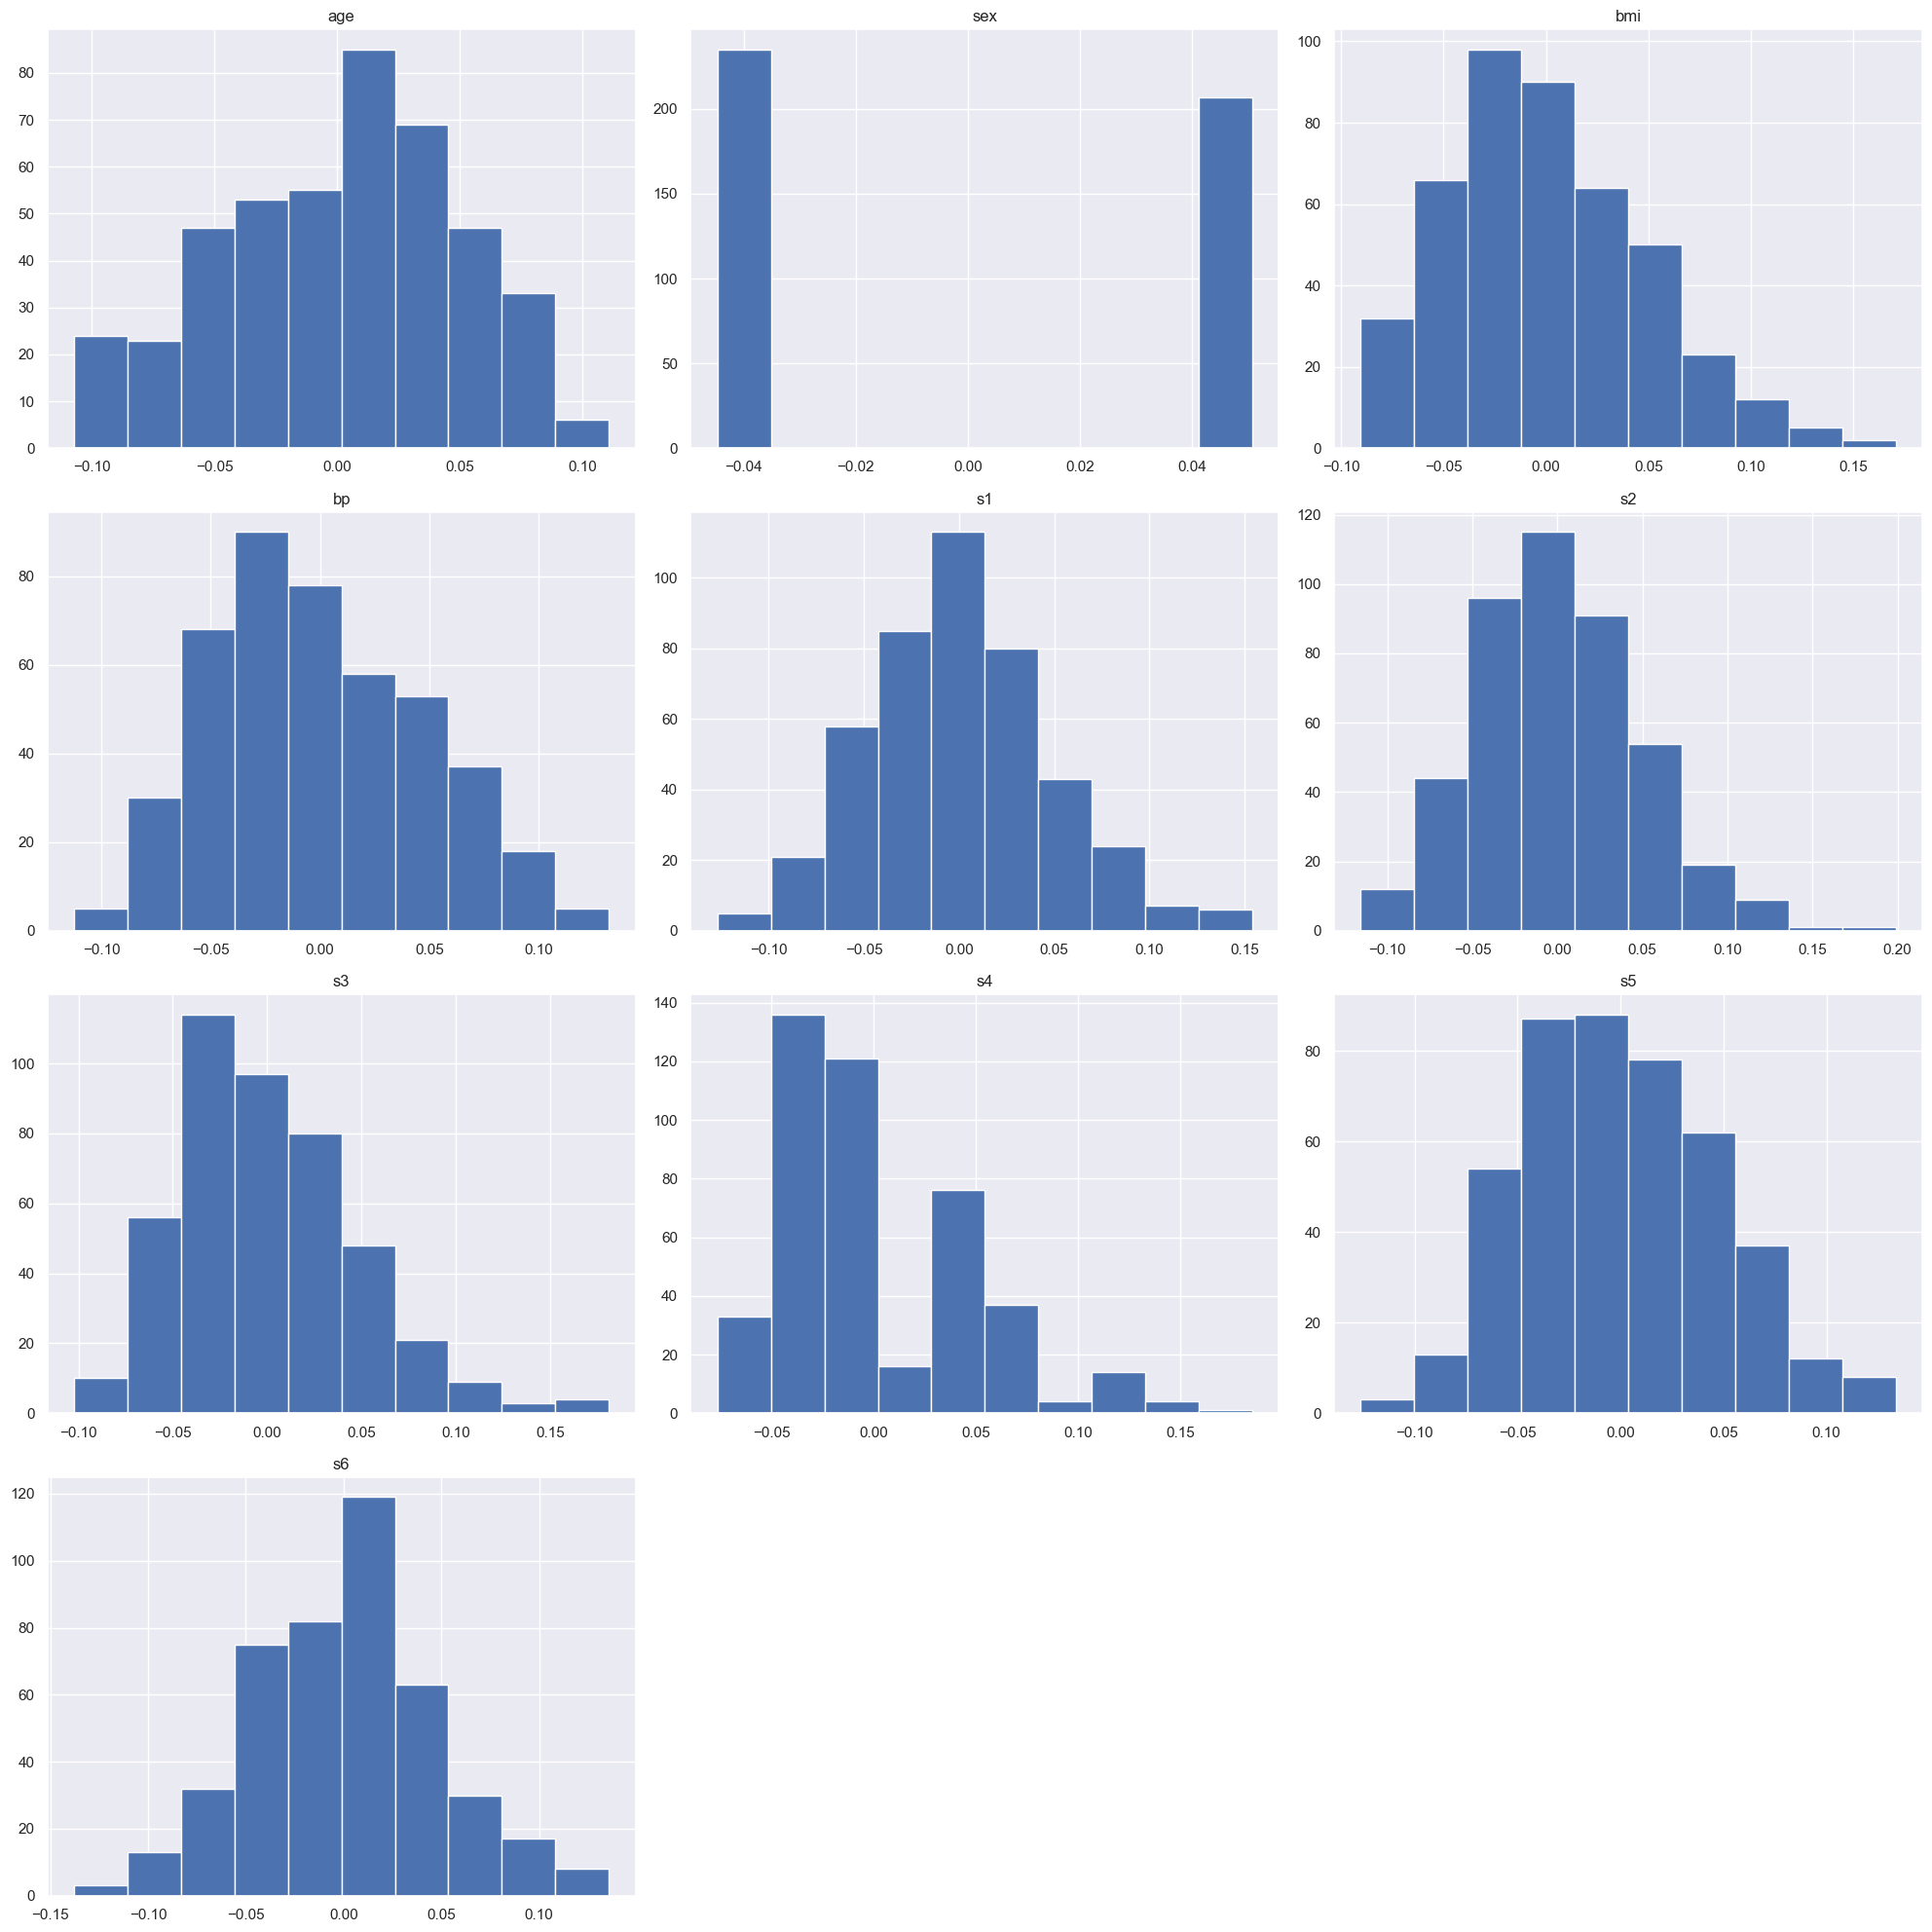

In [11]:
dfx.hist(figsize = (20,20))
plt.tight_layout()
plt.show()

We can see it follows normal assumption.

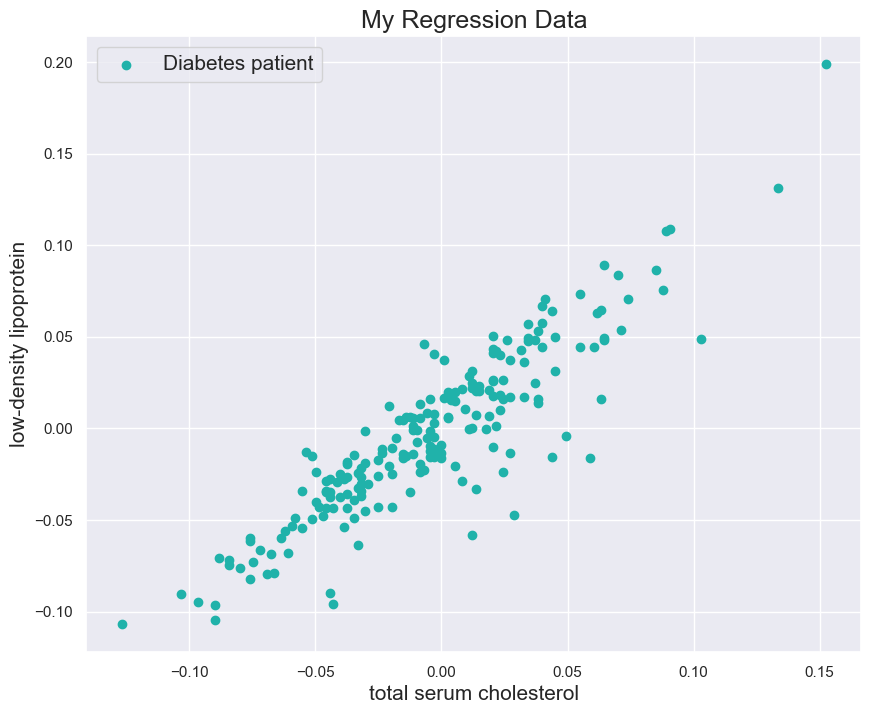

In [27]:

dfx = df[0].iloc[:200][["s1", "s2"]]
plt.figure(figsize = (10, 8))
plt.scatter(dfx.s1, 
            dfx.s2, 
            color = "lightseagreen",
            label = "Diabetes patient")
plt.xlabel("total serum cholesterol", fontsize = 15)
plt.ylabel("low-density lipoprotein", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

We can see from above graph that there is probably a linear relationship between total serum cholesterol and low-density lipoprotein. Next, we define our custom SingleNeuron class.

In [28]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


In [29]:
X = df[0].s1.values
X = X.reshape(-1, 1)
y = df[0].s2.values
#define an activation function
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.05, epochs = 10)

In [31]:
#define an activation function
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.05, epochs = 10)

To visualize the linear regression line by scatter plotting the data and also ploting the predicted output over some domain within the range of values of input features.

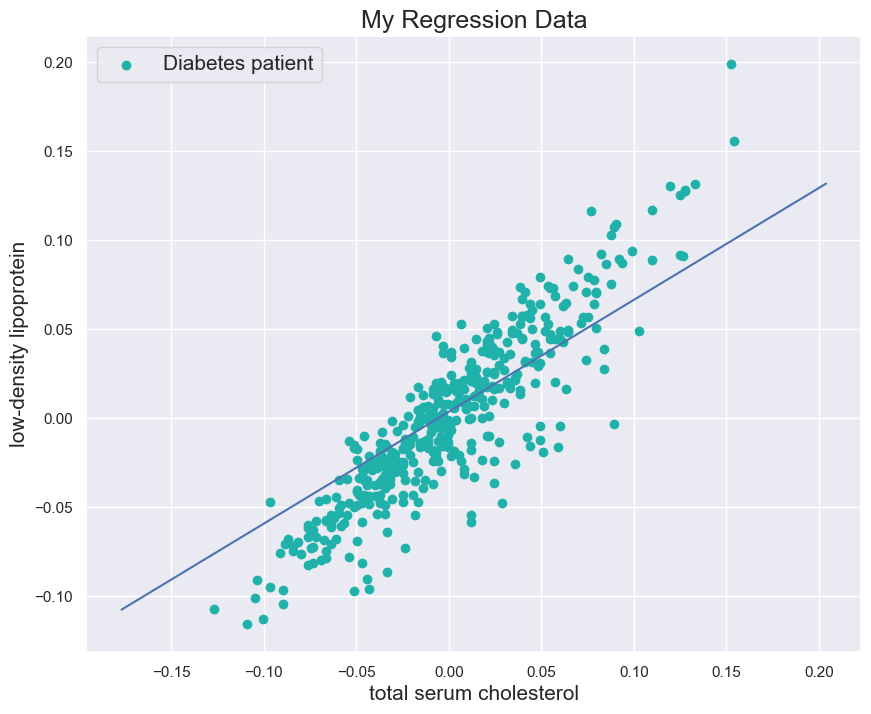

In [32]:
domain = np.linspace(np.min(X) - .05, np.max(X) + .05, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Diabetes patient")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("total serum cholesterol", fontsize = 15)
plt.ylabel("low-density lipoprotein", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

Verify this by plotting the MSE that we stored while training.

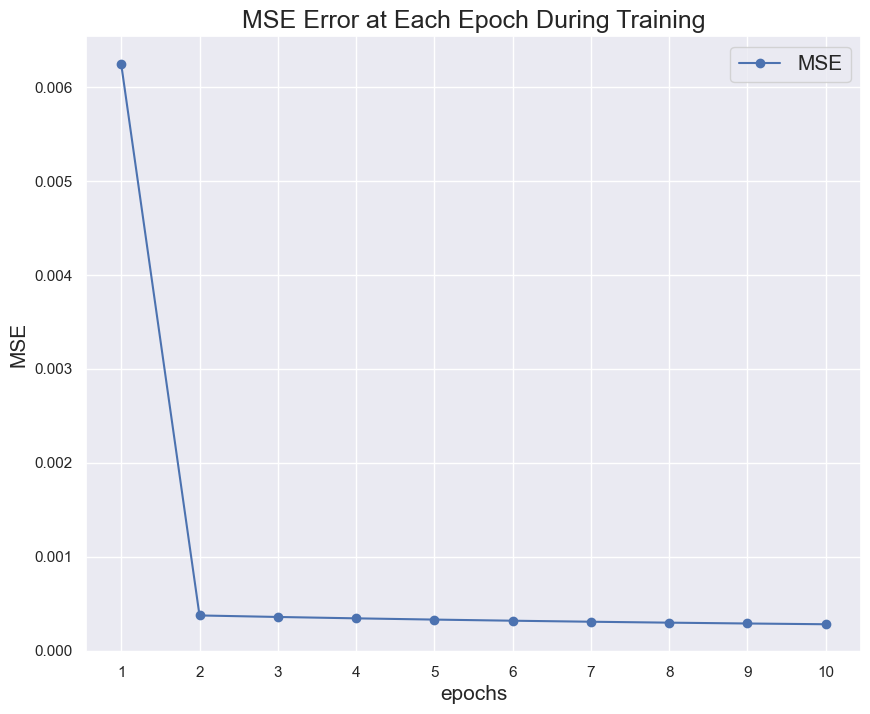

In [33]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

We can also change the learning rate and see that alpha=0.05 is the optimal learning rate.

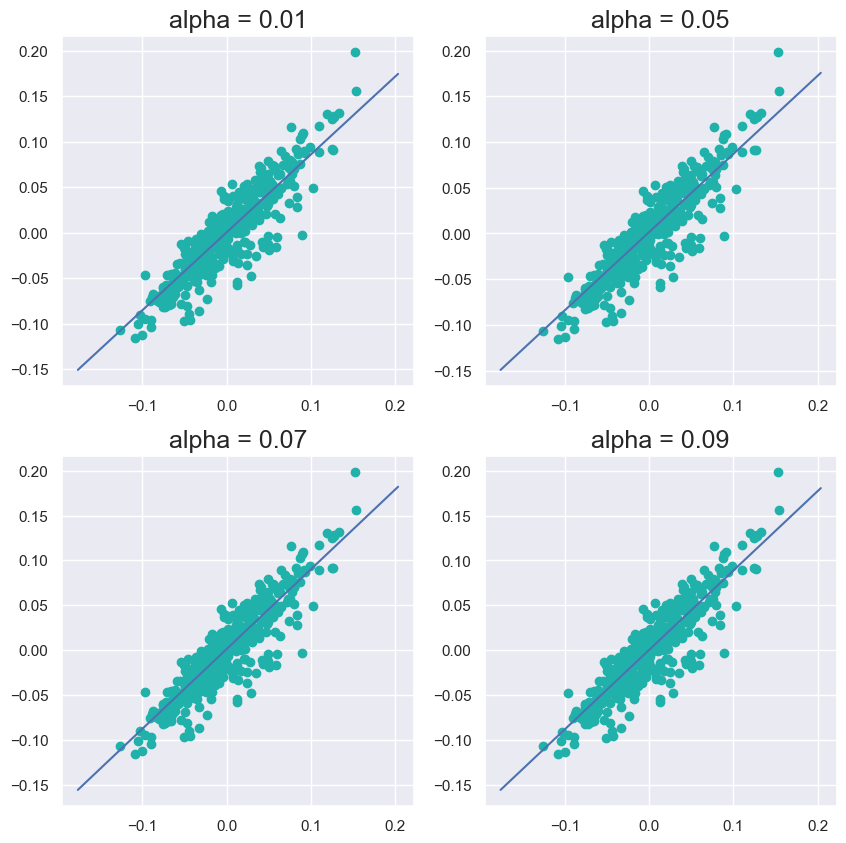

In [34]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .05, np.max(X) + .05, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 50)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)